In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import keras

from keras.models import Sequential 
from keras.layers import Dense, Activation, Convolution2D, Reshape, Flatten, MaxPooling2D, Dropout
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

Using Theano backend.


In [3]:
ds = pd.read_csv('fer2013.csv')
d = ds.values
d.shape

(35887, 3)

In [4]:
tem = d[:, 1]
print(d.shape)
pixels = np.zeros((d.shape[0], 48*48))
print(pixels.shape)
for ix in range(pixels.shape[0]):
    t = tem[ix].split(' ')
    for iy in range(pixels.shape[1]):
        pixels[ix, iy] = int(t[iy])


(35887, 3)
(35887, 2304)


In [6]:
print (pixels.shape)
pixels -= np.mean(pixels, axis=0)
pixels /= np.std(pixels, axis=0)


(35887, 2304)


In [7]:
labels = d[:, 0]
print (labels.shape)

y = np_utils.to_categorical(labels)
print (y.shape)

(35887,)
(35887, 7)


In [8]:
split = int(0.80*pixels.shape[0])

x_train = pixels[:split]
y_train = y[:split]

x_test = pixels[split:]
y_test = y[split:]

print (x_train.shape, x_test.shape)
print (y_train.shape, y_test.shape)

(28709, 2304) (7178, 2304)
(28709, 7) (7178, 7)


In [9]:
x_train = x_train.reshape((x_train.shape[0], 48, 48,1))
x_test = x_test.reshape((x_test.shape[0], 48, 48,1))

print (x_train.shape, x_test.shape)
print (y_train.shape, y_test.shape)

(28709, 48, 48, 1) (7178, 48, 48, 1)
(28709, 7) (7178, 7)


In [12]:
np.random.seed(2222)
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128,init='lecun_uniform'))
model.add(Dropout(0.4))
model.add(Activation('relu'))
model.add(Dense(7))
model.add(Activation('softmax'))

#training the model with cross sgd and nesterov momentum

sgd = SGD(lr=0.055, decay=1e-6, momentum=0.9, nesterov=True)
#optm = RMSprop(lr=0.004, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16928)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2166912   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
__________

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(48, 48, 1..., padding="valid")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, kernel_initializer="lecun_uniform")`
  import sys


In [13]:
hist=model.fit(x_train,y_train , batch_size=128 , nb_epoch=15)

/usr/local/lib/python3.5/dist-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/15
28709/28709 [==============================] - 47s - loss: 1.6371 - acc: 0.3522    
Epoch 2/15
28709/28709 [==============================] - 46s - loss: 1.4895 - acc: 0.4170    - ETA: 3s - loss: 1.4
Epoch 3/15
28709/28709 [==============================] - 45s - loss: 1.4057 - acc: 0.4568    
Epoch 4/15
28709/28709 [==============================] - 45s - loss: 1.3358 - acc: 0.4836    
Epoch 5/15
28709/28709 [==============================] - 44s - loss: 1.2656 - acc: 0.5151    - ETA: 3s - loss: 1
Epoch 6/15
28709/28709 [==============================] - 45s - loss: 1.1929 - acc: 0.5414    - ETA: 3s - loss: 1
Epoch 7/15
28709/28709 [==============================] - 45s - loss: 1.1230 - acc: 0.5688    
Epoch 8/15
28709/28709 [==============================] - 45s - loss: 1.0580 - acc: 0.5972    
Epoch 9/15
28709/28709 [==============================] - 48s - loss: 0.9838 - acc: 0.6267    
Epoch 10/15
28709/28709 [==============================] - 51s - loss: 0.9155 - acc: 0

In [10]:
test = np.zeros((d.shape[0], 48*48))
for ix in range(test.shape[0]):
    t = tem[ix].split(' ')
    for iy in range(test.shape[1]):
        test[ix, iy] = int(t[iy])

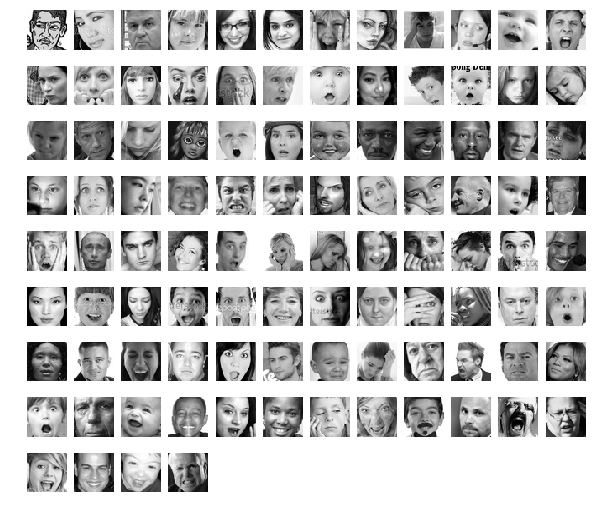

In [11]:
fig = plt.figure(figsize=(10,10))

for ix in range(100):
    ax = plt.subplot(10,12,ix+1)
    ax.set_title = ix
    plt.imshow(test[split+ix].reshape((48, 48)),cmap='gray')
    plt.axis('off')

In [16]:
pre = x_test[:100]
print (pre.shape)
ans = model.predict(pre, batch_size=3)

correct=0
for ix in range(100):
    if np.argmax(ans[ix]) == np.argmax(y_test[ix]):
        correct += 1
        


(100, 48, 48, 1)
50


In [20]:
import h5py
model.save('face_reco132.h5')  
f = h5py.File('face_reco132.h5', 'r+')
del f['optimizer_weights']
f.close()